## Target Analyizing

In this project, we aim to find ball location during the game. As there are infinite numbers of the data points in the pitch surface, it's merely impossible to predict exact ball location each time. Therefore, we've divided pitch into the 295 (1-295) equal segments, each in size of 5x5m. In our data set we're not given ball location for each data frame, we're only given player informations; such as it's speed, coordinates, which team and which player has the ball.
If any player has the ball for a moment, we accept its location as ball location and use this location to label our target value from 1 to 295. if the game is stopped or nobody has the ball, then our target value becomes 0.

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import scipy as sc
import pandas as pd
import operator
import math

pd.options.display.max_columns = None

pd.set_option('compute.use_bottleneck', True)
pd.set_option('compute.use_numexpr', True)

features_df = pd.read_csv('../data/match_{}/features_set.csv'.format(match_id))

### Histogram of target detecion (ball location segments)

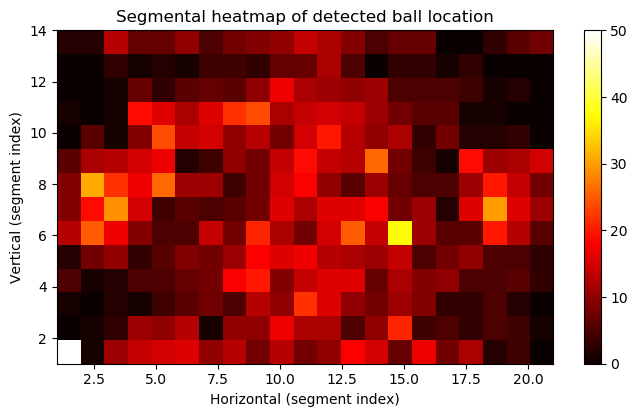

In [106]:
ball_detected = []

index_dict = {'x':{}, 'y':{}}

index = 1
for i in range(1,22):
    for j in range(1,15):
        index_dict['x'][index] = i
        index_dict['y'][index] = j
        index +=1



for i in features_df['pitch_index']:
    if i != 0:
        ball_detected.append([index_dict['x'][i],index_dict['y'][i]])
        
ball_detected = np.array(ball_detected)

plt.figure(figsize=(8, 4.33))  # 14x21 number of segments that we divided pitch into
plt.hist2d(ball_detected[:,0], ball_detected[:,1], cmap='hot', bins=(21,14))

plt.title('Segmental heatmap of detected ball location')
plt.xlabel('Horizontal (segment index)')
plt.ylabel('Vertical (segment index)')
plt.colorbar();
plt.show()

Histogram of ball segments isn't concentrated on the certain area of the pitch, but is more tended to center as expected. This result seems to be pormising in case of detecting ball position index

### Inbalanced target data

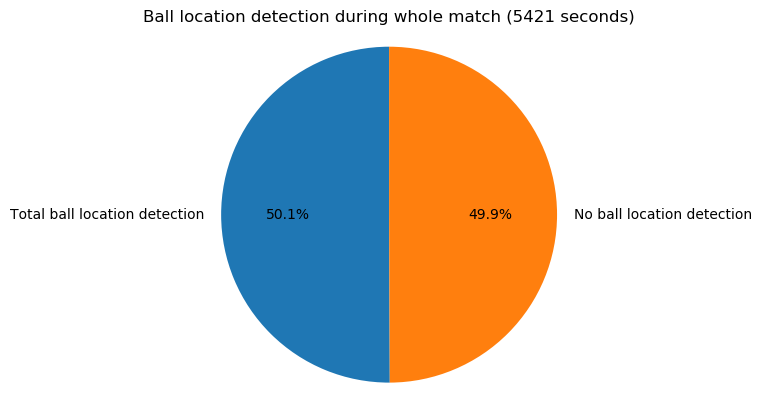

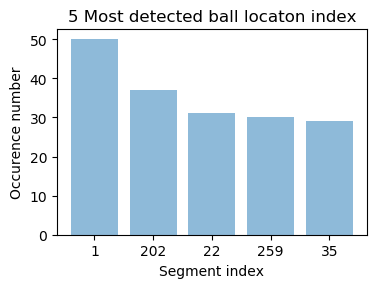

In [102]:
ball_location_index = {}
for i in range(0,296):
    ball_location_index[i]=0

has_ball_count = 0 
for col in features_df['pitch_index']:
    if int(col)!=0:
        has_ball_count +=1
    ball_location_index[col] += 1

ball_location_index = sorted(ball_location_index.items(), key=operator.itemgetter(1))    
    

labels = 'Total ball location detection', 'No ball location detection',
sizes = [has_ball_count, len(features_df['pitch_index'])-has_ball_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax1.axis('equal')
plt.title('Ball location detection during whole match ('+ str(len(features_df['pitch_index'])) + ' seconds)')
plt.show()


location_dection=[]
index=[]
y_pos = np.arange(len(objects))

for i in range(1,6):
    location_dection.append(ball_location_index[295-i][1])
    index.append(str(ball_location_index[295-i][0]))
    
width = 4
plt.figure(figsize=(width, width/1.5))
plt.bar(y_pos, location_dection, align='center', alpha=0.5)
plt.xticks(y_pos, index)
plt.ylabel('Occurence number')
plt.xlabel('Segment index')
plt.title('5 Most detected ball locaton index')
 
plt.show()

As it seems in the pie chart above, ball location (location index in this case) data is far more imbalanced, where the number of 'no ball info' event almost *equals to the total number of 'has ball info' events*. Thus, while building our train and test set we should reduce the number of 'no ball info' events in the data set. We should keep its number close to the number of most occurred ball location indexes.